In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['font.size'] = 13

In [2]:
N_train = 400
N_test = 100
noise = 50
X_train = np.random.randint(low=200,high=2000,size=N_train)
X_test = np.random.randint(low=200,high=2000,size=N_test)

Y_train = 0.5*X_train + noise*np.random.randn(N_train)*1.5*X_train/np.mean(X_train)+5e1
Y_test = 0.5*X_test + 1e-4*X_test**2 + noise*np.random.randn(N_test)*1.5*X_test/np.mean(X_test)+5e1

In [5]:
for i in range(10):
    print("Square feet = {}, House price = {:.2f}".format(X_train[i],Y_train[i]))

Square feet = 686, House price = 462.88
Square feet = 1094, House price = 588.92
Square feet = 1768, House price = 789.56
Square feet = 1447, House price = 834.66
Square feet = 1951, House price = 1004.52
Square feet = 887, House price = 572.49
Square feet = 350, House price = 224.36
Square feet = 1983, House price = 1049.32
Square feet = 654, House price = 418.71
Square feet = 455, House price = 298.97


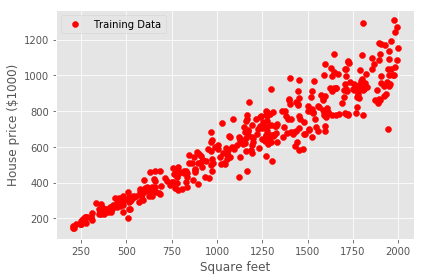

In [6]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.xlabel('Square feet')
plt.ylabel('House price ($1000)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
Yhat_1 = 0.6*X_train + 100
Yhat_2 = 0.6*X_train + 50
Yhat_3 = 0.5*X_train + 50

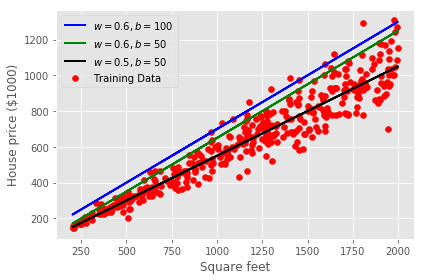

In [8]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.plot(X_train,Yhat_1, color='b',linewidth=2, label=r'$w=0.6, b=100$')
plt.plot(X_train,Yhat_2, color='g',linewidth=2, label=r'$w=0.6, b=50$')
plt.plot(X_train,Yhat_3, color='k',linewidth=2, label=r'$w=0.5, b=50$')
plt.xlabel('Square feet')
plt.ylabel('House price ($1000)')
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

In [9]:
def MSE(Y,Yhat):
    return np.mean((Y-Yhat)**2)

In [12]:
print("Error for w=0.6, b=100 is: {:.2f}".format(MSE(Y_train,Yhat_1)) )
print("Error for w=0.6, b=100 is: {:.2f}".format(MSE(Y_train,Yhat_2)) )
print("Error for w=0.5, b=50 is: {:.2f}".format(MSE(Y_train,Yhat_3)) )

Error for w=0.6, b=100 is: 34080.96
Error for w=0.6, b=100 is: 20725.08
Error for w=0.5, b=50 is: 6579.78


In [13]:
def gradient(x,y,w,b):
    yhat = w*x+b
    return -2*np.mean((y-yhat)*x),-2*np.mean(y-yhat)

In [34]:
learning_rate_w = 1e-8
learning_rate_b = 1e-3

N_iterations = 100

w = 1.0
b = 100

print_every = 10

train_loss = []
test_loss  = []
iters      = []
weights    = []
biases     = []

for i in range(N_iterations):
        g = gradient(X_train,Y_train,w,b)
        
        w = w-learning_rate_w*g[0]
        b = b-learning_rate_b*g[1]
        
        #logging
        if (i+1)%print_every == 0:
            Yhat = w*X_train+b
            e = MSE(Y_train,Yhat)
            train_loss.append(e)
            
            Yhat_test = w*X_test+b
            e_test = MSE(Y_test,Yhat_test)
            test_loss.append(e_test)
            
            iters.append(i)
            weights.append(w)
            biases.append(b)
            print("Iteration {}: w={:.2f}, b={:.2f}, MSE_train = {:.2f},\
                MSE_test = {:.2f}".format(i,w,b,e,e_test))

Iteration 9: w=0.86, b=89.36, MSE_train = 233061.40, MSE_test = 81150.44
Iteration 19: w=0.75, b=81.76, MSE_train = 122036.71, MSE_test = 29622.46
Iteration 29: w=0.68, b=76.31, MSE_train = 65435.23, MSE_test = 13036.29
Iteration 39: w=0.63, b=72.42, MSE_train = 36579.21, MSE_test = 11494.31
Iteration 49: w=0.59, b=69.62, MSE_train = 21868.06, MSE_test = 15644.54
Iteration 59: w=0.56, b=67.61, MSE_train = 14368.09, MSE_test = 21284.80
Iteration 69: w=0.54, b=66.17, MSE_train = 10544.46, MSE_test = 26676.54
Iteration 79: w=0.53, b=65.13, MSE_train = 8595.05, MSE_test = 31221.77
Iteration 89: w=0.52, b=64.37, MSE_train = 7601.13, MSE_test = 34821.46
Iteration 99: w=0.51, b=63.82, MSE_train = 7094.34, MSE_test = 37572.14


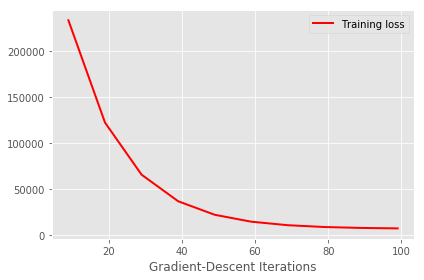

In [35]:
plt.plot(iters,train_loss,linewidth=2,color='r',label='Training loss')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.tight_layout()
plt.show()

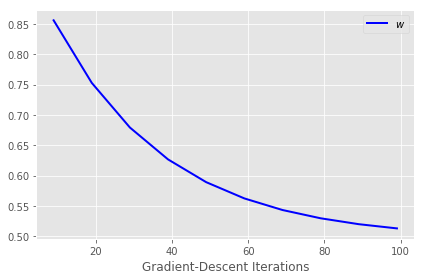

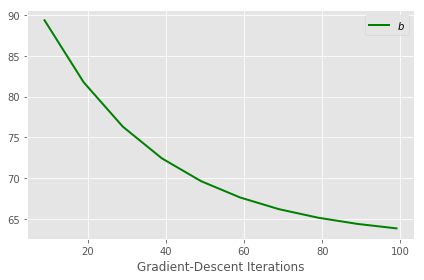

In [41]:
plt.plot(iters,weights,linewidth=2,color='b',label=r'$w$')
plt.xlabel('Gradient-Descent Iterations')
plt.tight_layout()
plt.legend()
plt.show()

plt.plot(iters,biases,linewidth=2,color='g',label=r'$b$')
plt.xlabel('Gradient-Descent Iterations')
plt.tight_layout()
plt.legend()
plt.show()

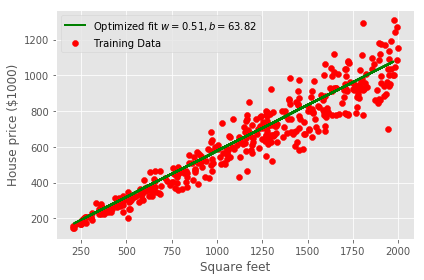

In [38]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.plot(X_test,Yhat_test, color='g', linewidth=2, label=r'Optimized fit $w=0.51,b=63.82$')
plt.xlabel('Square feet')
plt.ylabel('House price ($1000)')
plt.legend()
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

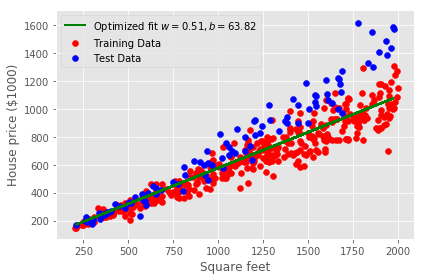

In [39]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.scatter(X_test,Y_test, color='b', label='Test Data')
plt.plot(X_test,Yhat_test, color='g', linewidth=2, label=r'Optimized fit $w=0.51,b=63.82$')
plt.xlabel('Square feet')
plt.ylabel('House price ($1000)')
plt.legend()
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()